![](https://i.imgur.com/JsMvGnP.png)

# Projeto - Classificação

## 1. Considerações iniciais

Neste notebook iremos praticar a construção de um modelo de Machine Learning. Na atividade, iremos utilizar um algoritmo para realizar um processo de classificação. 

Como o foco da atividade será percorrer o fluxo do Aprendizado de Máquina por inteiro (ou o máximo dele), evitaremos, propositalmente, adentrar em algoritmos e explicações mais complexas.


### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes que interrompem suas assinaturas de um serviço dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

Os dados necessários podem ser encontrados no [repositório da atividade](https://github.com/awarischool/br-classification-project). No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

### 3.1 Análise exploratória

In [ ]:
# Instalando codigos:

!pip install xgboost
!pip install catboost

In [40]:
# seu código
# Importando as bibliotecas:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
# from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import seaborn
import matplotlib.pyplot as plt
 

# seaborn.set()

In [14]:
# Leitura do Banco de Dados: Churn_Modelling.csv:

df = pd.read_csv('Churn_Modelling.csv')


In [15]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [16]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.shape

# Existem 14 colunas no total em nosso conjunto de dados:
## ANálise dos Campos:

Nem todas as colunas afetam a rotatividade do cliente. 

RowNumber  - corresponde ao número do registro (linha) e não tem efeito na saída. 
===> Esta coluna será removida.

CustomerId - contém valores aleatórios e não tem efeito sobre a saída do cliente do banco. 
===> Esta coluna será removida.

Surname    — O sobrenome de um cliente não tem impacto sobre sua decisão de deixar o banco. 
===> Esta coluna será removida.

CreditScore - pode ter um efeito na rotatividade de clientes, uma vez que um cliente com uma
              pontuação de crédito mais alta tem menos probabilidade de sair do banco.

Geography — A localização de um cliente pode afetar sua decisão de deixar o banco. Manteremos esta coluna.

Gender    — É interessante explorar se o gênero desempenha um papel na saída do cliente do banco. 
            Incluiremos esta coluna também.
            
Age       — Isso é certamente relevante, uma vez que os clientes mais velhos
            têm menos probabilidade de sair do banco do que os mais jovens.    
            
Tenure    — Refere-se ao número de anos que o cliente é cliente do banco. 
            Normalmente, os clientes mais velhos são mais leais e menos propensos a deixar um banco.
            
Balance   - também um bom indicador de rotatividade de clientes, já que as pessoas com um saldo mais alto
            em suas contas têm menos probabilidade de deixar o banco em comparação com aquelas com saldos mais                 baixos.
NumOfProducts — Refere-se ao número de produtos que um cliente comprou por meio do banco.

HasCrCard - denota se um cliente tem ou não um cartão de crédito. 
            Essa coluna também é relevante, uma vez que pessoas com cartão de crédito têm menos 
            probabilidade de sair do banco.
            
IsActiveMember - os clientes ativos têm menos probabilidade de sair do banco, portanto, ficaremos com isso.

EstimatedSalary — Como equilíbrio, pessoas com salários mais baixos têm maior probabilidade de sair do
                banco em comparação com aqueles com salários mais altos.
                
Exited     —Se o cliente saiu ou não do banco. Isso é o que temos que prever.

Após a observação cuidadosa dos recursos, remover as colunas: 
    RowNumber, 
    CustomerIde 
    Surname
Todas as colunas restantes contribuem para a rotatividade do cliente de uma forma ou de outra.




In [17]:
df.info()

# Todas as colunas, nenhuma possui NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
# Verifica a coluna "Exited" indica:
# 0 ==> cliente quer permancecer na empresa
# 1 ==> cliente quer sair da empresa

df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

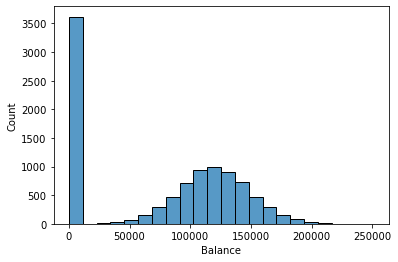

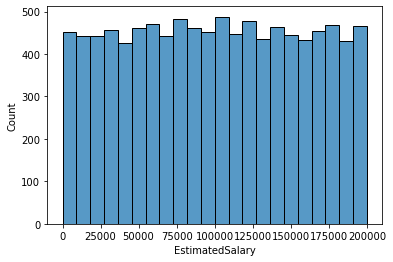

In [19]:
for col in df.select_dtypes('float') :
    plt.figure()
    sns.histplot(df[col])
    plt.show()

### 3.2 Preparação e limpeza dos dados

In [20]:
# seu código:
# O DataFrame dataset: contém os 11 campos necessários para análise:

dataset = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
dataset.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [21]:
# seu código:

# Em nosso conjunto de dados, temos duas colunas CATEGóRICAS: 
#    - Geographye 
#    - Gender 
#    
# Essas duas colunas contêm dados em formato textual ==> precisamos convertê-los em colunas numéricas.

# Vamos primeiro ISOLANDO essas duas colunas de nosso conjunto de dados. 
# dataset contém 9 colunas:

dataset =  dataset.drop(['Geography', 'Gender'], axis=1)

dataset.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1


## Usando a função get.DUMMIES

Uma maneira de converter colunas CATEGóRICAS por colunas numéricas:
1) Substituir cada categoria por um número. P
   Gender
   feminino    = 0 
   masculino =  1, 
    
OBS: Somente colunas com apenas duas categorias.

2) Na coluna como Geography: 
        Spain
        Germany
        France
        
OBS: Geografia com três ou mais categorias, você pode usar 
      os valores 0, 1 e 2 para os três países da França, Alemanha e Espanha. 
      No entanto, se você fizer isso, os algoritmos de aprendizado de máquina assumirão que existe uma relação
      ordinal entre os três países. Em outras palavras, o algoritmo assumirá que 2 é maior que 1 e 0, 
      o que não é o caso em termos dos países subjacentes que os números representam.


In [22]:
# Tratando os campos CATEGÓRICOS:

# Com a Função get.dummmies, método da biblioteca pandas 
# converte colunas categóricas ==> colunas numéricas. 
# Atenção: .iloc[:,1:] ignora a primeira coluna [0] ==> retorna o restante das colunas (Alemanha e Espanha). 

   
Geography = pd.get_dummies(df.Geography).iloc[:,1:]
Gender    = pd.get_dummies(df.Gender).iloc[:,1:]

Geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [23]:
Geography.sum()

Germany    2509
Spain      2477
dtype: int64

In [24]:
# Após tratar as colunas, juntando as duas colunas Geography e Gender no dataset:

dataset = pd.concat([dataset, Geography, Gender], axis=1)

dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


### 3.3 Seleção de atributos:

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification


In [25]:
# seu código:

# O Dataset está preparado, mas será preciso isolar o campo "Exit",
# Onde X = contém todo dataframe, menos o campo "Exited"
#      y = somente o campo "Exited"

X =  dataset.drop(['Exited'], axis=1)
y =  dataset['Exited']

In [ ]:
# (1) ALGORITMO DE FLORESTA ALEATÓRIA

In [26]:
# Com X e y ==> train e test:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
# seu código

### 3.4 Construção do modelo

In [69]:
# seu código:
# Com o ALGORITMO DE FLORESTA ALEATÓRIA , por ser simples 
# e um dos algoritmos mais poderosos para problemas de classificação .

# Para treinar esse algoritmo, chamamos o fit método e passamos o conjunto
# de recursos (X) e o conjunto de rótulos correspondente (y). 

classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)  
predictions = classifier.predict(X_test)


In [ ]:
# seu código

### 3.5 Avaliação do modelo

In [70]:
# seu código:

print(classification_report(y_test,predictions ))  
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1573
           1       0.77      0.44      0.56       427

    accuracy                           0.85      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.85      0.84      2000

0.8535


<AxesSubplot:>

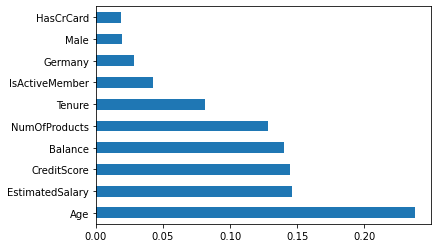

In [71]:
# seu código:

# RandomForestClassifiercontém um atributo denominado feature_importanceq ue contém informações 
# sobre os recursos mais importantes para uma determinada classificação.

feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

# Conclusão :
# Com base nesses dados, a idade tem o maior impacto na rotatividade de clientes,
# seguida pelo salário estimado e pelo saldo da conta de um cliente

# (2) Algoritmo LOGISTIC REGRESSION (LR)

In [ ]:
# Utiliza os mesmos campos do ALGORITMO DE FLORESTA ALEATÓRIA,
# X = todo dataset e 
# y = coluna "Exited"

In [43]:
# Comandos iguais:  feature ==> X = datset.drop['Survived']
#
#features = [w for w in df.columns if w!="Exited"]
# target = "Survived"
# X = df[features]
# y = df[target]


lr = LogisticRegression()

# O Dataset está preparado, mas será preciso isolar o campo "Exited",
# Onde X = contém todo dataframe, menos o campo "Exited"
#      y = somente o campo "Exited"

X =  dataset.drop(['Exited'], axis=1)
y =  dataset['Exited']




In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12345)


In [58]:
# Para treinar o algoritmo, chamamos o fit método e passamos
# o dataset de (X) e o conjunto correspondente (y).

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

<AxesSubplot:>

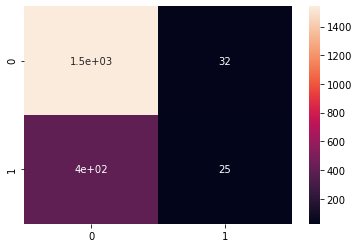

In [59]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [60]:
# Anaálise do y ==> Test classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1573
           1       0.44      0.06      0.10       427

    accuracy                           0.78      2000
   macro avg       0.62      0.52      0.49      2000
weighted avg       0.72      0.78      0.71      2000



In [64]:
# Train classification report:

print(classification_report(y_train, dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      6390
           1       0.86      0.30      0.45      1610

    accuracy                           0.85      8000
   macro avg       0.85      0.64      0.68      8000
weighted avg       0.85      0.85      0.82      8000



# Algoritmo DECISION TREE (DT)

In [8]:
# O Dataset está preparado, mas será preciso isolar o campo "Exit",
# Onde X = contém todo dataframe, menos o campo "Exited"
#      y = somente o campo "Exited"

# Usaremos o mesmo X = dataset e y = "Exited"

In [61]:
# # seu código:

# Tendo: X e y ==> train e test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12345)

In [62]:
# Com o algoritmo Decision Tree (dt)

# Para treinar esse algoritmo, chamamos o FIT método e passamos o conjunto
# de recursos (X) e o conjunto de rótulos correspondente (y). 

dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

<AxesSubplot:>

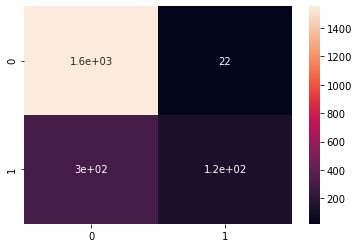

In [57]:
# Test confusion matrix:

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [63]:
# Test classification report: Decision Tree

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1573
           1       0.85      0.29      0.44       427

    accuracy                           0.84      2000
   macro avg       0.84      0.64      0.67      2000
weighted avg       0.84      0.84      0.81      2000



### 3.4 Otimização do modelo

In [ ]:
# seu código

In [ ]:
# seu código

## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após a avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. 

Você pode, por exemplo, remover variáveis/atributos menos importantes, normalizar variáveis importantes e escolher outros algoritmos de aprendizagem supervisionada. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.